<a href="https://colab.research.google.com/github/Nhung-Nguyen86/DataScience/blob/main/NLP_application_for_efficiently_search_on_scientific_papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function to extract text from a PDF file

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)

        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text


In [ ]:
#Extract the text from the pdf file
pdf_path = r'C:\Users\nguye\OneDrive\Desktop\Chapman\Spring 2024\NLP\Final Project\Paper1.pdf'
full_text = extract_text_from_pdf(pdf_path)
print(full_text)


 1 
  Abstract—Numerical simulations have become an essential design tool in the field of photonics, especially for nanophotonics.  In particular, 3D finite-difference-time-domain (FDTD) simulations are popular for their powerful design capabilities. Increasingly, researchers are developing or using inverse design tools to improve device footprints and performance. These tools often make use of 3D FDTD simulations and the adjoint optimization method. In this work, we implement a commercial inverse design tool with these features for several plasmonic devices   with complex design requirements. We design a logic gate with complex design requirements, as well as a y-splitter and waveguide crossing. With minimal code changes, we implement a design that incorporates phase encoded inputs in a dielectric-loaded surface plasmon polariton waveguide. The complexity of the requirements in conjunction with limitations in the inverse design tool force us to make concessions regarding the density o

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# We define the keywords in this specific topic, which is Physics
keywords = ['plasmonic', 'inverse design', 'simulation', 'surface plasmon polaritons', 'digital logic',
            'optical logic', 'phase-shift keying']

In [ ]:
from nltk.probability import FreqDist

def get_keywords(tokens, keywords, num_keywords=10):

    find_keywords = [word for word in tokens if word in keywords]
    freq_dist = FreqDist(find_keywords)
    return freq_dist.most_common(num_keywords)

In [ ]:
text = extract_text_from_pdf(pdf_path)
tokens = preprocess_text(text)

In [ ]:
# We need to get the frequency of specified keywords
keyword_frequencies = get_keywords(tokens, keywords, 5)
print(keyword_frequencies)

[('plasmonic', 24), ('simulation', 20)]


To find a phrase instead of individual words in a list of tokens, you need to adjust how you handle tokenization and keyword matching in your function. For phrases, we can't tokenize into individual words unless you use a method that retains multi-word sequences or directly search the raw text before splitting it into tokens.
Explanation:
Case Sensitivity: The search is made case-insensitive by converting both the text and the phrases to lowercase. This ensures that all variations in capitalization are caught.
Regular Expressions: re.findall is used to find all occurrences of each phrase. The re.escape function is used to escape any special characters in the phrase, making it safe to use in a regular expression.
Counting Occurrences: The Counter from the collections module counts how many times each phrase appears in the text.

In [ ]:
import re
from collections import Counter

def find_phrases_in_text(full_text, phrases):

    phrase_count = Counter()

    for phrase in phrases:

        matches = re.findall(re.escape(phrase.lower()), full_text.lower())
        phrase_count[phrase] = len(matches)

    return phrase_count

phrases = ['plasmonic', 'inverse design', 'simulation', 'surface plasmon polaritons', 'digital logic',
            'optical logic', 'phase-shift keying']
phrase_frequencies = find_phrases_in_text(full_text, phrases)
print(phrase_frequencies)


Counter({'inverse design': 66, 'simulation': 34, 'plasmonic': 27, 'digital logic': 5, 'phase-shift keying': 4, 'optical logic': 3, 'surface plasmon polaritons': 1})


In [ ]:
from nltk.probability import FreqDist

# Find frequency of each word
freq_dist = FreqDist(tokens)
most_common_words = freq_dist.most_common(50)
print(most_common_words)


[(',', 478), ('.', 373), ('design', 128), ('(', 99), (')', 99), ('inverse', 71), ('device', 69), ('[', 59), (']', 59), ('devices', 54), ('waveguide', 41), ('output', 40), ('xor', 39), (':', 38), ('inputs', 35), ('phase', 31), ('“', 30), ('”', 30), ('tools', 29), ('using', 28), ('optimization', 27), ('logic', 26), ('crossing', 26), ('power', 26), ('!', 26), ('inverse-designed', 25), ('loss', 25), ('tool', 24), ('plasmonic', 24), ('doi', 24), ('vol', 23), ('area', 22), ('waveguides', 21), ('gate', 20), ('simulation', 20), ('conventional', 20), ('y-splitter', 19), ('used', 19), ('b', 19), ('use', 18), ('designs', 18), ('insertion', 18), ('two', 17), ('figure', 17), ('input', 17), ('performance', 16), ('behavior', 16), ('lumerical', 16), ('m.', 16), ('one', 15)]


In [ ]:
text = nltk.Text(tokens)
text.collocations(40)

inverse design; insertion loss; waveguide crossing; xor gate; design
tool; output port; extinction ratio; power inside; shown figure;
design tools; radians phase; row shows; conventional design; phase-
shift keying; 0/0 rad; 1/π rad; higher-order psk; chapman university;
intermediate stages; encoding schemes; inputs in-phase; dielectric-
loaded surface; surface plasmon; digital logic; substantially lower;
lower insertion; output waveguides; adjoint method; limitations
inverse; phase adjuster; compares important; one another; inverse-
designed device; accessed jun; plasmonic devices; logic gates; copper
color; fowler school; school engineering; performance comparison


In [ ]:
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens

[('1', 'CD'),
 ('abstract—numerical', 'JJ'),
 ('simulations', 'NNS'),
 ('become', 'VBP'),
 ('essential', 'JJ'),
 ('design', 'NN'),
 ('tool', 'NN'),
 ('field', 'NN'),
 ('photonics', 'NNS'),
 (',', ','),
 ('especially', 'RB'),
 ('nanophotonics', 'NNS'),
 ('.', '.'),
 ('particular', 'JJ'),
 (',', ','),
 ('3d', 'CD'),
 ('finite-difference-time-domain', 'NN'),
 ('(', '('),
 ('fdtd', 'NN'),
 (')', ')'),
 ('simulations', 'NNS'),
 ('popular', 'JJ'),
 ('powerful', 'JJ'),
 ('design', 'NN'),
 ('capabilities', 'NNS'),
 ('.', '.'),
 ('increasingly', 'RB'),
 (',', ','),
 ('researchers', 'NNS'),
 ('developing', 'VBG'),
 ('using', 'VBG'),
 ('inverse', 'JJ'),
 ('design', 'NN'),
 ('tools', 'NNS'),
 ('improve', 'VB'),
 ('device', 'NN'),
 ('footprints', 'NNS'),
 ('performance', 'NN'),
 ('.', '.'),
 ('tools', 'NNS'),
 ('often', 'RB'),
 ('make', 'VBP'),
 ('use', 'JJ'),
 ('3d', 'CD'),
 ('fdtd', 'JJ'),
 ('simulations', 'NNS'),
 ('adjoint', 'VBP'),
 ('optimization', 'NN'),
 ('method', 'NN'),
 ('.', '.'),
 ('wo

In [ ]:
#in this part, we want to find which corpus that the paper with some keywords has been appear the most

In [ ]:
import nltk
from nltk.corpus import brown, reuters, inaugural
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('brown')
nltk.download('reuters')
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')

keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

corpora = {
    'brown': brown.words(),
    'reuters': reuters.words(),
    'inaugural': inaugural.words()
}

# Function to count keyword occurrences in a given corpus
def count_keywords(corpus_words, keywords):
    stop_words = set(stopwords.words('english'))

    words = [word.lower() for word in corpus_words if word.isalpha() and word.lower() not in stop_words]
    # Count occurrences
    keyword_counts = {keyword: sum(1 for word in words if keyword in word) for keyword in keywords}
    return keyword_counts

# We analyzing in each corpus
results = {}
for corpus_name, corpus_words in corpora.items():
    results[corpus_name] = count_keywords(corpus_words, keywords)

for corpus_name, keyword_counts in results.items():
    print(f"Results for {corpus_name} corpus:")
    for keyword, count in keyword_counts.items():
        print(f"  {keyword}: {count}")
    print("\n")


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Results for brown corpus:
  tool: 89
  design: 322
  device: 92
  inverse: 10
  waveguide: 0
  input: 20
  simualation: 0
  optical: 20
  performance: 155
  physics: 37
  logic: 345
  digital: 8
  power: 517
  conventional: 57
  lumerical: 0


Results for reuters corpus:
  tool: 72
  design: 182
  device: 32
  inverse: 0
  waveguide: 0
  input: 12
  simualation: 0
  optical: 7
  performance: 171
  physics: 21
  logic: 67
  digital: 18
  power: 300
  conventional: 15
  lumerical: 0


Results for inaugural corpus:
  tool: 2
  design: 13
  device: 4
  inverse: 0
  waveguide: 0
  input: 0
  simualation: 0
  optical: 0
  performance: 16
  physics: 0
  logic: 7
  digital: 1
  power: 377
  conventional: 1
  lumerical: 0




1. Keyword Prevalence:
Common Terms: Words like "tool," "design," "device," "input," "performance," and "power" appear relatively frequently across at least two of the three corpora, indicating their broad usage in diverse contexts.
Technical Terms: More specialized terms like "waveguide," "simualation" (note: the correct spelling is "simulation"), and "lumerical" show zero occurrences, reflecting their specific usage in fields not commonly covered by these general-purpose corpora.

In [ ]:
#Part 3: Evaluate the tag in this paper. Evaluate Accuracy score in Regexep tagger, Unigram tagger and compare the two

In [ ]:
tokens = nltk.word_tokenize(full_text)

In [ ]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(full_text)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag

sentences = sent_tokenize(full_text)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize the text into sentences
sentences = sent_tokenize(full_text)

# Tokenize each sentence into words and tag them
tagged_sentences = [pos_tag(word_tokenize(sentence)) for sentence in sentences]


for i, tagged_sentence in enumerate(tagged_sentences,1):
    print(f"Tagged Sentence {i}: {tagged_sentence}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Tagged Sentence 1: [('1', 'CD'), ('Abstract—Numerical', 'JJ'), ('simulations', 'NNS'), ('have', 'VBP'), ('become', 'VBN'), ('an', 'DT'), ('essential', 'JJ'), ('design', 'NN'), ('tool', 'NN'), ('in', 'IN'), ('the', 'DT'), ('field', 'NN'), ('of', 'IN'), ('photonics', 'NNS'), (',', ','), ('especially', 'RB'), ('for', 'IN'), ('nanophotonics', 'NNS'), ('.', '.')]
Tagged Sentence 2: [('In', 'IN'), ('particular', 'JJ'), (',', ','), ('3D', 'CD'), ('finite-difference-time-domain', 'NN'), ('(', '('), ('FDTD', 'NNP'), (')', ')'), ('simulations', 'NNS'), ('are', 'VBP'), ('popular', 'JJ'), ('for', 'IN'), ('their', 'PRP$'), ('powerful', 'JJ'), ('design', 'NN'), ('capabilities', 'NNS'), ('.', '.')]
Tagged Sentence 3: [('Increasingly', 'RB'), (',', ','), ('researchers', 'NNS'), ('are', 'VBP'), ('developing', 'VBG'), ('or', 'CC'), ('using', 'VBG'), ('inverse', 'JJ'), ('design', 'NN'), ('tools', 'NNS'), ('to', 'TO'), ('improve', 'VB'), ('device', 'NN'), ('footprints', 'NNS'), ('and', 'CC'), ('performanc

In [ ]:
import nltk
from nltk.tag import RegexpTagger

patterns = [
 ('.*ing$','VBG'),
 ('.*ed$','VBD'),
 ('.*es$','VBZ'),
 ('.*ould$','MD'),
 ('.*\'s$','NN$'),
 ('.*s$','NNS'),
 ('^-?[0-9]+(\.[0-9]+)?$','CD'),
 ('.*','NN')
]

# We create a RegexpTagger
regexp_tagger = RegexpTagger(patterns)

tagged_sentences = [pos_tag(word_tokenize(sentence)) for sentence in sentences]

# We evaluate the tagger
accuracy = regexp_tagger.evaluate(tagged_sentences)
print(f"Accuracy of the RegexpTagger: {accuracy:.2%}")

Accuracy of the RegexpTagger: 25.26%


C:\Users\nguye\AppData\Local\Temp\ipykernel_956\1435947755.py:21: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = regexp_tagger.evaluate(tagged_sentences)


In [ ]:
tagged_tokens = regexp_tagger.tag(tokens)
tagged_tokens

[('1', 'CD'),
 ('Abstract—Numerical', 'NNP'),
 ('simulations', 'NNS'),
 ('have', 'NN'),
 ('become', 'NN'),
 ('an', 'DT'),
 ('essential', 'NN'),
 ('design', 'NN'),
 ('tool', 'IN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('photonics', 'NNS'),
 (',', 'NN'),
 ('especially', 'RB'),
 ('for', 'IN'),
 ('nanophotonics', 'NNS'),
 ('.', 'NN'),
 ('In', 'NNP'),
 ('particular', 'NN'),
 (',', 'NN'),
 ('3D', 'NN'),
 ('finite-difference-time-domain', 'NN'),
 ('(', 'NN'),
 ('FDTD', 'NNP'),
 (')', 'NN'),
 ('simulations', 'NNS'),
 ('are', 'DT'),
 ('popular', 'NN'),
 ('for', 'IN'),
 ('their', 'NN'),
 ('powerful', 'JJ'),
 ('design', 'NN'),
 ('capabilities', 'NNS'),
 ('.', 'NN'),
 ('Increasingly', 'NNP'),
 (',', 'NN'),
 ('researchers', 'NNS'),
 ('are', 'DT'),
 ('developing', 'VBG'),
 ('or', 'CC'),
 ('using', 'VBG'),
 ('inverse', 'IN'),
 ('design', 'NN'),
 ('tools', 'NNS'),
 ('to', 'IN'),
 ('improve', 'NN'),
 ('device', 'NN'),
 ('footprints', 'NNS'),
 ('and', 'DT'),
 ('performance', 

In [ ]:
keywords = keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

# Extract tags for the specific keywords
keyword_tags = {word: tag for word, tag in tagged_tokens if word in keywords}

# Print the results
print(keyword_tags)

{'design': 'NN', 'tool': 'IN', 'inverse': 'IN', 'device': 'NN', 'performance': 'NN', 'logic': 'NN', 'waveguide': 'NN', 'digital': 'NN', 'optical': 'NN', 'power': 'NN', 'input': 'IN', 'conventional': 'NN'}


In [ ]:
import nltk
from nltk.tag import RegexpTagger

patterns = [
    ('^[A-Z][a-z]+(?:-[A-Z][a-z]+)?(\'s)?$', 'NNP'),
    ('^[A-Z].*$', 'NNP'),
    ('.*ing$', 'VBG'),
    ('^-?[0-9]+(\.[0-9]+)?$', 'CD'),
    ('(.*ed|.*en)$', 'VBD'),
    ('.*ould$', 'MD'),
    ('(.*\'s|.*s\')$', 'POS'),
    ('.*ly$', 'RB'),
    ('.*ful$', 'JJ'),
    ('.*ous$', 'JJ'),
    ('.*ive$', 'JJ'),
    ('.*less$', 'JJ'),
    ('(.*s)$', 'NNS'),
    ('(.*es)$', 'VBZ'),
    ('^a|an|the$', 'DT'),
    ('^in|on|at|since|for|ago|before|to|past|by|until|with|about|of$', 'IN'),
    ('^and|but|or|yet|so|for|nor$', 'CC'),
    ('^he|she|it|they|him|her|them|his|hers|its|theirs|this|that|these|those$', 'PRP'),
    ('.*', 'NN')
]

# Create a RegexpTagger
regexp_tagger = RegexpTagger(patterns)

tagged_sentences = [pos_tag(word_tokenize(sentence)) for sentence in sentences]

# Evaluate the tagger
accuracy = regexp_tagger.evaluate(tagged_sentences)
print(f"Accuracy of the RegexpTagger: {accuracy:.2%}")

Accuracy of the RegexpTagger: 45.94%


C:\Users\nguye\AppData\Local\Temp\ipykernel_956\2075701067.py:32: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = regexp_tagger.evaluate(tagged_sentences)


In [ ]:
tagged_tokens = regexp_tagger.tag(tokens)
tagged_tokens

[('1', 'CD'),
 ('Abstract—Numerical', 'NNP'),
 ('simulations', 'NNS'),
 ('have', 'NN'),
 ('become', 'NN'),
 ('an', 'DT'),
 ('essential', 'NN'),
 ('design', 'NN'),
 ('tool', 'IN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('photonics', 'NNS'),
 (',', 'NN'),
 ('especially', 'RB'),
 ('for', 'IN'),
 ('nanophotonics', 'NNS'),
 ('.', 'NN'),
 ('In', 'NNP'),
 ('particular', 'NN'),
 (',', 'NN'),
 ('3D', 'NN'),
 ('finite-difference-time-domain', 'NN'),
 ('(', 'NN'),
 ('FDTD', 'NNP'),
 (')', 'NN'),
 ('simulations', 'NNS'),
 ('are', 'DT'),
 ('popular', 'NN'),
 ('for', 'IN'),
 ('their', 'NN'),
 ('powerful', 'JJ'),
 ('design', 'NN'),
 ('capabilities', 'NNS'),
 ('.', 'NN'),
 ('Increasingly', 'NNP'),
 (',', 'NN'),
 ('researchers', 'NNS'),
 ('are', 'DT'),
 ('developing', 'VBG'),
 ('or', 'CC'),
 ('using', 'VBG'),
 ('inverse', 'IN'),
 ('design', 'NN'),
 ('tools', 'NNS'),
 ('to', 'IN'),
 ('improve', 'NN'),
 ('device', 'NN'),
 ('footprints', 'NNS'),
 ('and', 'DT'),
 ('performance', 

In [ ]:
keywords = keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

# Extract tags for the specific keywords
keyword_tags = {word: tag for word, tag in tagged_tokens if word in keywords}

# Print the results
print(keyword_tags)


{'design': 'NN', 'tool': 'IN', 'inverse': 'IN', 'device': 'NN', 'performance': 'NN', 'logic': 'NN', 'waveguide': 'NN', 'digital': 'NN', 'optical': 'NN', 'power': 'NN', 'input': 'IN', 'conventional': 'NN'}


In [ ]:
##The tagger for each keyword is the same even when we improve the pattern for Regexp tagger
##By improve the pattern, the accuracy rate was improved from 25.26% to 45.94%

In [ ]:
#Unigram tagger (baseline_tagger)

In [ ]:
fd = nltk.FreqDist(brown.words(categories='news'))

In [ ]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))

In [ ]:
most_freq_words = fd.most_common(100)

In [ ]:
likely_tags = dict((word,cfd[word].max()) for (word,_) in most_freq_words)

In [ ]:
likely_tags


{'the': 'AT',
 ',': ',',
 '.': '.',
 'of': 'IN',
 'and': 'CC',
 'to': 'TO',
 'a': 'AT',
 'in': 'IN',
 'for': 'IN',
 'The': 'AT',
 'that': 'CS',
 '``': '``',
 'is': 'BEZ',
 'was': 'BEDZ',
 "''": "''",
 'on': 'IN',
 'at': 'IN',
 'with': 'IN',
 'be': 'BE',
 'by': 'IN',
 'as': 'CS',
 'he': 'PPS',
 'said': 'VBD',
 'his': 'PP$',
 'will': 'MD',
 'it': 'PPS',
 'from': 'IN',
 'are': 'BER',
 ';': '.',
 'an': 'AT',
 'has': 'HVZ',
 '--': '--',
 'had': 'HVD',
 'who': 'WPS',
 'have': 'HV',
 'not': '*',
 'Mrs.': 'NP',
 'were': 'BED',
 'this': 'DT',
 'which': 'WDT',
 'would': 'MD',
 'their': 'PP$',
 'been': 'BEN',
 'they': 'PPSS',
 'He': 'PPS',
 'one': 'CD',
 'I': 'PPSS',
 'but': 'CC',
 'its': 'PP$',
 'or': 'CC',
 ')': ')',
 'more': 'AP',
 'Mr.': 'NP',
 '(': '(',
 'up': 'RP',
 'all': 'ABN',
 'out': 'RP',
 'last': 'AP',
 'two': 'CD',
 'other': 'AP',
 ':': ':',
 'new': 'JJ',
 'first': 'OD',
 'than': 'IN',
 'year': 'NN',
 'A': 'AT',
 'about': 'IN',
 'there': 'EX',
 'when': 'WRB',
 'home': 'NN',
 'after':

In [ ]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

In [ ]:
tagged_sentences = [pos_tag(word_tokenize(sentence)) for sentence in sentences]

# Evaluate the tagger
accuracy = baseline_tagger.evaluate(tagged_sentences)
print(f"Accuracy of the Baseline_Tagger: {accuracy:.2%}")

Accuracy of the Baseline_Tagger: 27.37%


C:\Users\nguye\AppData\Local\Temp\ipykernel_956\3172063980.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = baseline_tagger.evaluate(tagged_sentences)


In [ ]:
tagged_tokens = baseline_tagger.tag(tokens)
tagged_tokens

[('1', 'NN'),
 ('Abstract—Numerical', 'NN'),
 ('simulations', 'NN'),
 ('have', 'HV'),
 ('become', 'NN'),
 ('an', 'AT'),
 ('essential', 'NN'),
 ('design', 'NN'),
 ('tool', 'NN'),
 ('in', 'IN'),
 ('the', 'AT'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('photonics', 'NN'),
 (',', ','),
 ('especially', 'NN'),
 ('for', 'IN'),
 ('nanophotonics', 'NN'),
 ('.', '.'),
 ('In', 'IN'),
 ('particular', 'NN'),
 (',', ','),
 ('3D', 'NN'),
 ('finite-difference-time-domain', 'NN'),
 ('(', '('),
 ('FDTD', 'NN'),
 (')', ')'),
 ('simulations', 'NN'),
 ('are', 'BER'),
 ('popular', 'NN'),
 ('for', 'IN'),
 ('their', 'PP$'),
 ('powerful', 'NN'),
 ('design', 'NN'),
 ('capabilities', 'NN'),
 ('.', '.'),
 ('Increasingly', 'NN'),
 (',', ','),
 ('researchers', 'NN'),
 ('are', 'BER'),
 ('developing', 'NN'),
 ('or', 'CC'),
 ('using', 'NN'),
 ('inverse', 'NN'),
 ('design', 'NN'),
 ('tools', 'NN'),
 ('to', 'TO'),
 ('improve', 'NN'),
 ('device', 'NN'),
 ('footprints', 'NN'),
 ('and', 'CC'),
 ('performance', 'NN'),
 ('.', '.')

In [ ]:
keywords = keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

# Extract tags for the specific keywords
keyword_tags = {word: tag for word, tag in tagged_tokens if word in keywords}

# Print the results
print(keyword_tags)

{'design': 'NN', 'tool': 'NN', 'inverse': 'NN', 'device': 'NN', 'performance': 'NN', 'logic': 'NN', 'waveguide': 'NN', 'digital': 'NN', 'optical': 'NN', 'power': 'NN', 'input': 'NN', 'conventional': 'NN'}


In [ ]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
 backoff=nltk.DefaultTagger('NN'))

In [ ]:
tagged_sentences = [pos_tag(word_tokenize(sentence)) for sentence in sentences]

accuracy = baseline_tagger.evaluate(tagged_sentences)
print(f"Accuracy of the Baseline_Tagger: {accuracy:.2%}")

Accuracy of the Baseline_Tagger: 43.96%


C:\Users\nguye\AppData\Local\Temp\ipykernel_956\3416137376.py:3: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = baseline_tagger.evaluate(tagged_sentences)


By using the the backoff tagger. In our case, every unknown word is tagged as a noun ('NN'). And it improve the accuracy from 27.37% to 43.96%.

In [ ]:
tagged_tokens = baseline_tagger.tag(tokens)
tagged_tokens

[('1', 'NN'),
 ('Abstract—Numerical', 'NN'),
 ('simulations', 'NN'),
 ('have', 'HV'),
 ('become', 'NN'),
 ('an', 'AT'),
 ('essential', 'NN'),
 ('design', 'NN'),
 ('tool', 'NN'),
 ('in', 'IN'),
 ('the', 'AT'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('photonics', 'NN'),
 (',', ','),
 ('especially', 'NN'),
 ('for', 'IN'),
 ('nanophotonics', 'NN'),
 ('.', '.'),
 ('In', 'IN'),
 ('particular', 'NN'),
 (',', ','),
 ('3D', 'NN'),
 ('finite-difference-time-domain', 'NN'),
 ('(', '('),
 ('FDTD', 'NN'),
 (')', ')'),
 ('simulations', 'NN'),
 ('are', 'BER'),
 ('popular', 'NN'),
 ('for', 'IN'),
 ('their', 'PP$'),
 ('powerful', 'NN'),
 ('design', 'NN'),
 ('capabilities', 'NN'),
 ('.', '.'),
 ('Increasingly', 'NN'),
 (',', ','),
 ('researchers', 'NN'),
 ('are', 'BER'),
 ('developing', 'NN'),
 ('or', 'CC'),
 ('using', 'NN'),
 ('inverse', 'NN'),
 ('design', 'NN'),
 ('tools', 'NN'),
 ('to', 'TO'),
 ('improve', 'NN'),
 ('device', 'NN'),
 ('footprints', 'NN'),
 ('and', 'CC'),
 ('performance', 'NN'),
 ('.', '.')

In [ ]:
keywords = keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

# Extract tags for the specific keywords
keyword_tags = {word: tag for word, tag in tagged_tokens if word in keywords}

# Print the results
print(keyword_tags)

{'design': 'NN', 'tool': 'NN', 'inverse': 'NN', 'device': 'NN', 'performance': 'NN', 'logic': 'NN', 'waveguide': 'NN', 'digital': 'NN', 'optical': 'NN', 'power': 'NN', 'input': 'NN', 'conventional': 'NN'}


In [ ]:
#after improving the Baseline_tagger, the tag for each keyword is not changed although the accuracy score improved dramatically.

In [ ]:
#Build train and test set for the Unigram and Bigram tagger, compare the two

In [ ]:
size = int(len(tagged_sentences)*.9)
size

355

In [ ]:
train_sents = tagged_sentences[:size]

In [ ]:
test_sents = tagged_sentences[size:]

In [ ]:
unigram_tagger = nltk.UnigramTagger(train_sents)

In [ ]:
tagged_sentences = [pos_tag(word_tokenize(sentence)) for sentence in sentences]

accuracy = unigram_tagger.evaluate(test_sents)
print(f"Accuracy of the Unigram_Tagger: {accuracy:.2%}")

Accuracy of the Unigram_Tagger: 74.94%


C:\Users\nguye\AppData\Local\Temp\ipykernel_956\1944455144.py:3: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = unigram_tagger.evaluate(test_sents)


In [ ]:
#For Unigram tagger, the accuracy after training is 74.94%

In [ ]:
tagged_tokens = unigram_tagger.tag(tokens)
tagged_tokens

[('1', 'CD'),
 ('Abstract—Numerical', 'JJ'),
 ('simulations', 'NNS'),
 ('have', 'VBP'),
 ('become', 'VBN'),
 ('an', 'DT'),
 ('essential', 'JJ'),
 ('design', 'NN'),
 ('tool', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('photonics', 'NNS'),
 (',', ','),
 ('especially', 'RB'),
 ('for', 'IN'),
 ('nanophotonics', 'NNS'),
 ('.', '.'),
 ('In', 'IN'),
 ('particular', 'JJ'),
 (',', ','),
 ('3D', 'CD'),
 ('finite-difference-time-domain', 'NN'),
 ('(', '('),
 ('FDTD', 'NNP'),
 (')', ')'),
 ('simulations', 'NNS'),
 ('are', 'VBP'),
 ('popular', 'JJ'),
 ('for', 'IN'),
 ('their', 'PRP$'),
 ('powerful', 'JJ'),
 ('design', 'NN'),
 ('capabilities', 'NNS'),
 ('.', '.'),
 ('Increasingly', 'RB'),
 (',', ','),
 ('researchers', 'NNS'),
 ('are', 'VBP'),
 ('developing', 'VBG'),
 ('or', 'CC'),
 ('using', 'VBG'),
 ('inverse', 'JJ'),
 ('design', 'NN'),
 ('tools', 'NNS'),
 ('to', 'TO'),
 ('improve', 'VB'),
 ('device', 'NN'),
 ('footprints', 'NNS'),
 ('and', 'CC'),
 ('performance', 'NN'

In [ ]:
keywords = keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

# Extract tags for the specific keywords
keyword_tags = {word: tag for word, tag in tagged_tokens if word in keywords}

# Print the results
print(keyword_tags)

{'design': 'NN', 'tool': 'NN', 'inverse': 'JJ', 'device': 'NN', 'performance': 'NN', 'logic': 'JJ', 'waveguide': 'NN', 'digital': 'JJ', 'optical': 'JJ', 'power': 'NN', 'input': 'NN', 'conventional': 'JJ'}


In [ ]:
###Evaluate for Bigram tagger

In [ ]:
bigram_tagger = nltk.BigramTagger(train_sents)

In [ ]:
tagged_sentences = [pos_tag(word_tokenize(sentence)) for sentence in sentences]

accuracy = bigram_tagger.evaluate(test_sents)
print(f"Accuracy of the Bigram_Tagger: {accuracy:.2%}")

Accuracy of the Bigram_Tagger: 16.01%


C:\Users\nguye\AppData\Local\Temp\ipykernel_956\1253107008.py:3: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = bigram_tagger.evaluate(test_sents)


In [ ]:
#however, for Bigram tagger, the accuracy is low at 16.01%

In [ ]:
tagged_tokens = bigram_tagger.tag(tokens)
tagged_tokens

[('1', 'CD'),
 ('Abstract—Numerical', 'JJ'),
 ('simulations', 'NNS'),
 ('have', 'VBP'),
 ('become', 'VBN'),
 ('an', 'DT'),
 ('essential', 'JJ'),
 ('design', 'NN'),
 ('tool', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('photonics', 'NNS'),
 (',', ','),
 ('especially', 'RB'),
 ('for', 'IN'),
 ('nanophotonics', 'NNS'),
 ('.', '.'),
 ('In', None),
 ('particular', None),
 (',', None),
 ('3D', None),
 ('finite-difference-time-domain', None),
 ('(', None),
 ('FDTD', None),
 (')', None),
 ('simulations', None),
 ('are', None),
 ('popular', None),
 ('for', None),
 ('their', None),
 ('powerful', None),
 ('design', None),
 ('capabilities', None),
 ('.', None),
 ('Increasingly', None),
 (',', None),
 ('researchers', None),
 ('are', None),
 ('developing', None),
 ('or', None),
 ('using', None),
 ('inverse', None),
 ('design', None),
 ('tools', None),
 ('to', None),
 ('improve', None),
 ('device', None),
 ('footprints', None),
 ('and', None),
 ('performance', None),
 ('.

In [ ]:
keywords = keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

# Extract tags for the specific keywords
keyword_tags = {word: tag for word, tag in tagged_tokens if word in keywords}

# Print the results
print(keyword_tags)

{'design': None, 'tool': None, 'inverse': None, 'device': None, 'performance': None, 'logic': None, 'waveguide': None, 'digital': None, 'optical': None, 'power': None, 'input': None, 'conventional': None}


In [ ]:
train_sents = tagged_sentences[:size]

In [ ]:
test_sents = tagged_sentences[size:]

In [ ]:
bigram_tagger = nltk.BigramTagger(train_sents)

In [ ]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents,backoff=t1)

In [ ]:
accuracy = t2.evaluate(test_sents)
print(f"Accuracy of the Bigram_Tagger: {accuracy:.2%}")

Accuracy of the Bigram_Tagger: 76.33%


C:\Users\nguye\AppData\Local\Temp\ipykernel_956\2023974917.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = t2.evaluate(test_sents)


In [ ]:
tagged_tokens = t2.tag(tokens)
tagged_tokens

[('1', 'CD'),
 ('Abstract—Numerical', 'JJ'),
 ('simulations', 'NNS'),
 ('have', 'VBP'),
 ('become', 'VBN'),
 ('an', 'DT'),
 ('essential', 'JJ'),
 ('design', 'NN'),
 ('tool', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('photonics', 'NNS'),
 (',', ','),
 ('especially', 'RB'),
 ('for', 'IN'),
 ('nanophotonics', 'NNS'),
 ('.', '.'),
 ('In', 'IN'),
 ('particular', 'JJ'),
 (',', ','),
 ('3D', 'CD'),
 ('finite-difference-time-domain', 'NN'),
 ('(', '('),
 ('FDTD', 'NNP'),
 (')', ')'),
 ('simulations', 'NNS'),
 ('are', 'VBP'),
 ('popular', 'JJ'),
 ('for', 'IN'),
 ('their', 'PRP$'),
 ('powerful', 'JJ'),
 ('design', 'NN'),
 ('capabilities', 'NNS'),
 ('.', '.'),
 ('Increasingly', 'RB'),
 (',', ','),
 ('researchers', 'NNS'),
 ('are', 'VBP'),
 ('developing', 'VBG'),
 ('or', 'CC'),
 ('using', 'VBG'),
 ('inverse', 'JJ'),
 ('design', 'NN'),
 ('tools', 'NNS'),
 ('to', 'TO'),
 ('improve', 'VB'),
 ('device', 'NN'),
 ('footprints', 'NNS'),
 ('and', 'CC'),
 ('performance', 'NN'

In [ ]:
keywords = keywords = ['tool','design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics',
            'logic', 'digital','power', 'conventional', 'lumerical']

# Extract tags for the specific keywords
keyword_tags = {word: tag for word, tag in tagged_tokens if word in keywords}

# Print the results
print(keyword_tags)

{'design': 'NN', 'tool': 'NN', 'inverse': 'NN', 'device': 'JJ', 'performance': 'NN', 'logic': 'NN', 'waveguide': 'NN', 'digital': 'JJ', 'optical': 'JJ', 'power': 'NN', 'input': 'NN', 'conventional': 'JJ'}


Before using backoff taggers:
{'design': None, 'tool': None, 'inverse': None, 'device': None, 'performance': None, 'logic': None, 'waveguide': None, 'digital': None, 'optical': None, 'power': None, 'input': None, 'conventional': None}
After using backoff taggers:
{'design': 'NN', 'tool': 'NN', 'inverse': 'NN', 'device': 'JJ', 'performance': 'NN', 'logic': 'NN', 'waveguide': 'NN', 'digital': 'JJ', 'optical': 'JJ', 'power': 'NN', 'input': 'NN', 'conventional': 'JJ'}
As we can see the backoff taggers improve significantly keywords taggers accuracy. In the bigram without backoff tagger, all keywords were tagged "None". However, after appying backoff tagger, each keyword had different tags.

The use of backoff taggers increases accuracy from 16.01% to 76.33% by combining the strengths of different tagging approaches:

t0: Coverage: The Default Tagger ensures that every word gets tagged, providing complete coverage even if it's not the most accurate.

t1: Single-word Context (Unigram): The Unigram Tagger adds accuracy for frequently seen words, tagging them based on their most common usage in the training set.

t2: Two-word Context (Bigram): The Bigram Tagger introduces contextual awareness, significantly improving accuracy for words whose tags depend heavily on the preceding words.

By chaining these taggers with the backoff mechanism, the system tries the most context-aware approach first (Bigram Tagger) and progressively falls back to simpler taggers when necessary. This approach effectively balances accuracy with coverage, ensuring that more tags are correctly predicted by using contextual data where available, while still providing a fallback option for unseen words or contexts

In [ ]:
#Data visualization

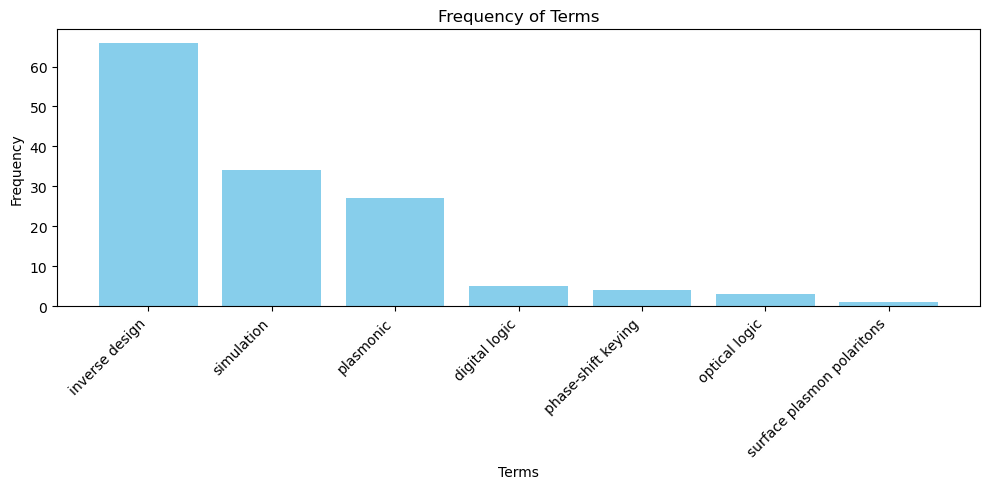

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

data = Counter({
    'inverse design': 66,
    'simulation': 34,
    'plasmonic': 27,
    'digital logic': 5,
    'phase-shift keying': 4,
    'optical logic': 3,
    'surface plasmon polaritons': 1
})

labels = list(data.keys())
values = list(data.values())


plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')

plt.title('Frequency of Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


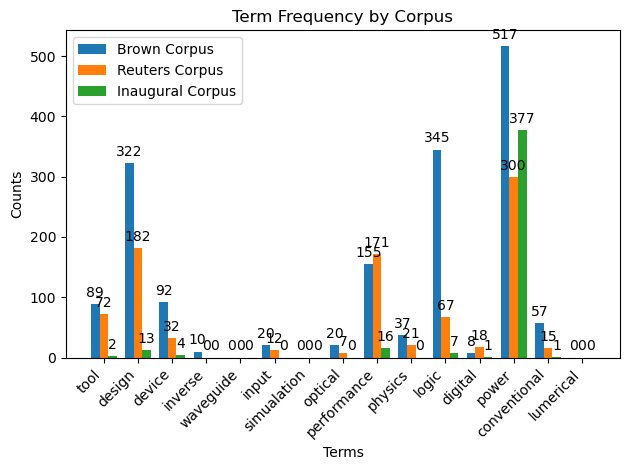

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

terms = ['tool', 'design', 'device', 'inverse', 'waveguide', 'input', 'simualation', 'optical', 'performance', 'physics', 'logic', 'digital', 'power', 'conventional', 'lumerical']
brown_counts = [89, 322, 92, 10, 0, 20, 0, 20, 155, 37, 345, 8, 517, 57, 0]
reuters_counts = [72, 182, 32, 0, 0, 12, 0, 7, 171, 21, 67, 18, 300, 15, 0]
inaugural_counts = [2, 13, 4, 0, 0, 0, 0, 0, 16, 0, 7, 1, 377, 1, 0]

x = np.arange(len(terms))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, brown_counts, width, label='Brown Corpus')
rects2 = ax.bar(x, reuters_counts, width, label='Reuters Corpus')
rects3 = ax.bar(x + width, inaugural_counts, width, label='Inaugural Corpus')

ax.set_xlabel('Terms')
ax.set_ylabel('Counts')
ax.set_title('Term Frequency by Corpus')
ax.set_xticks(x)
ax.set_xticklabels(terms, rotation=45, ha="right")
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


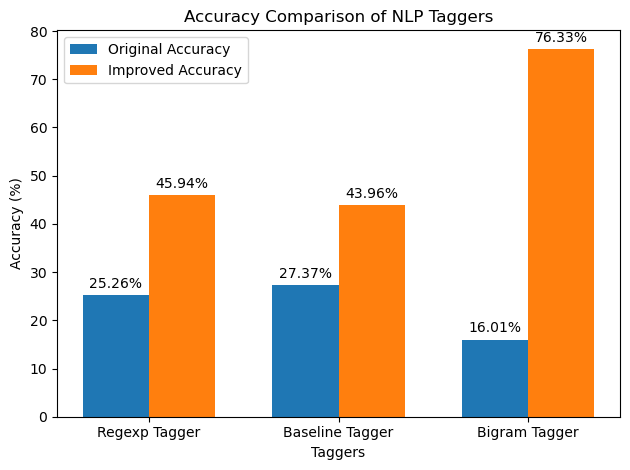

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

taggers = ['Regexp Tagger', 'Baseline Tagger', 'Bigram Tagger']
original_accuracies = [25.26, 27.37, 16.01]
improved_accuracies = [45.94, 43.96, 76.33]

x = np.arange(len(taggers))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_accuracies, width, label='Original Accuracy')
rects2 = ax.bar(x + width/2, improved_accuracies, width, label='Improved Accuracy')

ax.set_xlabel('Taggers')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison of NLP Taggers')
ax.set_xticks(x)
ax.set_xticklabels(taggers)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
